<img src="https://bsbr.com.br/wp-content/uploads/2018/05/01_logo-bsbr-padrao-med.png" width="200"/>

**by: [João Ataíde](https://www.joaoataide.com/)**
___

# **WEEK 3 - Análise de dados ENAD**
**Instituto Business School Brasil <br>
MBA Pesquisa Operacional e Tomada de Decisão<br>
Disciplina de Estatítica <br>
Prof. Thiago Marques <br>**

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRhKXLrhVnS_qPf92p5eUKlKCJfvbZM7xLSBA&usqp=CAU" width="50"/>

## **PRÁTICA EM R**


In [11]:
#Pasta do diretório
setwd(
  "/content/dir_pratica"
)

getwd()

[1] "/content/dir_pratica"

In [ ]:
#Instalando pacotes
vetor_pacotes = c(
  "readr",
  "ggplot2",
  "plotly",
  "e1071",
  "dplyr",
  "Hmisc",
  "DescTools",
  "esquisse",
  "kableExtra",
  "gridExtra",
  "e1071",
  "devtools"
)
install.packages(vetor_pacotes)

lapply(vetor_pacotes,
       require,
       character.only = TRUE)

In [12]:
#base do R (Mais flexível e menor performance de velocidade)
microdados_enade = read.table(
    "MICRODADOS_ENADE_2017.txt",
    header = TRUE,
    sep = ";",
    dec = ",",
    colClasses = c(NT_OBJ_FG = "numeric")
)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“number of items read is not a multiple of the number of columns”


In [13]:
head(microdados_enade)

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,⋯,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2017,1,1,10028,5710,3,1,5103403,51,5,⋯,,,,,,,,,,
2,2017,1,1,10028,5710,3,1,5103403,51,5,⋯,,,,,,,,,,
3,2017,1,1,10028,5710,3,1,5103403,51,5,⋯,,,,,,,,,,
4,2017,1,1,10028,5710,3,1,5103403,51,5,⋯,,,,,,,,,,
5,2017,1,1,10028,5710,3,1,5103403,51,5,⋯,,,,,,,,,,
6,2017,1,1,10028,5710,3,1,5103403,51,5,⋯,,,,,,,,,,


In [68]:
enade2017 = read_delim(("MICRODADOS_ENADE_2017.txt"))

Rows: 352858 Columns: 150

── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (63): TP_SEXO, DS_VT_GAB_OFG_ORIG, DS_VT_GAB_OFG_FIN, DS_VT_GAB_OCE_ORIG...
dbl (87): NU_ANO, CO_IES, CO_CATEGAD, CO_ORGACAD, CO_GRUPO, CO_CURSO, CO_MOD...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [69]:
head(enade2017)

NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,⋯,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Verificando as dimensões do banco

In [70]:
dim(enade2017)

[1] 352858    150

In [71]:
dim(enade2017)[1]

[1] 352858

In [72]:
dim(enade2017)[2]

[1] 150

## Selecionando as variaveis desejadas

In [58]:
microdados_enade_filtrados = enade2017 %>% dplyr::select(
    CO_GRUPO,
    CO_REGIAO_CURSO,
    NU_IDADE,
    TP_SEXO,
    CO_TURNO_GRADUACAO,
    NT_GER,
    QE_I01,
    QE_I02,
    QE_I08,
    QE_I21,
    QE_I23,
    NT_OBJ_FG,
    NT_OBJ_CE
) 

In [59]:
names(microdados_enade_filtrados)

[1] "CO_GRUPO"           "CO_REGIAO_CURSO"    "NU_IDADE"          
 [4] "TP_SEXO"            "CO_TURNO_GRADUACAO" "NT_GER"            
 [7] "QE_I01"             "QE_I02"             "QE_I08"            
[10] "QE_I21"             "QE_I23"             "NT_OBJ_FG"         
[13] "NT_OBJ_CE"

In [60]:
#Selecionar cursos de ADS
microdados_ti= microdados_enade_filtrados %>% filter(CO_GRUPO==72) 

In [61]:
table(microdados_ti$CO_GRUPO)


  72 
4120 

## Entendendo CASE_WHEN e IFELSE

In [62]:
professor = c("JOAO ATAIDE", "OUTRO", "OUTRO1", "OUTRO2")
ifelse(professor == "JOAO ATAIDE", "AULA LEGAL", "AULA CHATA")

[1] "AULA LEGAL" "AULA CHATA" "AULA CHATA" "AULA CHATA"

In [63]:
ifelse(professor == "JOAO ATAIDE" & professor == "ATAIDE" ,
        "AULA LEGAL", "AULA CHATA")

[1] "AULA CHATA" "AULA CHATA" "AULA CHATA" "AULA CHATA"

In [64]:
case_when((professor == "JOAO ATAIDE" | professor == "ATAIDE") ~ "AULA LEGAL",
TRUE ~ "CHATA")

[1] "AULA LEGAL" "CHATA"      "CHATA"      "CHATA"

### Exemplo de If Else

In [80]:
microdados_ti$estado_civil = ifelse(
  microdados_ti$QE_I01 == "A",
  "Solteiro(a)",
  ifelse(
    microdados_ti$QE_I01 == "B",
    "Casado(a)",
    ifelse(
      microdados_ti$QE_I01 == "C",
      "Separado(a)",
      ifelse(microdados_ti$QE_I01 ==
               "D", "Viúvo(a)", "Outro")
    )
  )
)

In [81]:
head(microdados_ti)

CO_GRUPO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,CO_TURNO_GRADUACAO,NT_GER,QE_I01,QE_I02,QE_I08,QE_I21,QE_I23,NT_OBJ_FG,NT_OBJ_CE,estado_civil
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
72,3,21,F,1,21.7,A,D,A,B,C,25.0,15,Solteiro(a)
72,3,24,F,1,29.7,A,B,C,A,B,62.5,20,Solteiro(a)
72,3,30,M,4,35.3,D,D,A,B,D,37.5,35,Viúvo(a)
72,3,23,M,1,13.1,A,D,F,B,C,25.0,10,Solteiro(a)
72,3,20,M,1,27.5,A,A,B,A,B,37.5,20,Solteiro(a)
72,3,23,M,4,20.3,A,D,A,B,C,25.0,20,Solteiro(a)


#### Transformando as variaveis (Colocando os labels)

In [82]:
#ESTADO CIVIL
microdados_ti = microdados_ti %>% mutate(
  estado_civil2 = case_when(
    QE_I01 == "A" ~ "Solteiro(a)",
    QE_I01 == "B" ~ "Casado(a)",
    QE_I01 == "C" ~ "Separado(a)",
    QE_I01 == "D" ~ "Viúvo(a)",
    QE_I01 == "E" ~ "Outro"
  )
)
#REGIAO
microdados_ti = microdados_ti %>% mutate(
  regiao = case_when(
    CO_REGIAO_CURSO == 1 ~ "Norte",
    CO_REGIAO_CURSO == 2 ~ "Nordeste",
    CO_REGIAO_CURSO == 3 ~ "Sudeste",
    CO_REGIAO_CURSO == 4 ~ "Sul",
    CO_REGIAO_CURSO == 5 ~ "Centro-Oeste"
  )
)

#SEXO
microdados_ti = microdados_ti %>% mutate(sexo = case_when(TP_SEXO == "M" ~ "Masculino",
                                                          TP_SEXO == "F" ~ "Feminino"))

microdados_ti = microdados_ti %>% mutate(
  hestudos = case_when(
    QE_I23 == "A" ~ "Nenhuma, apenas assisto as aulas",
    QE_I23 == "B" ~ "De uma a três",
    QE_I23 == "C" ~ "De quatro a sete",
    QE_I23 == "D" ~ "De oito a doze",
    QE_I23 == "E" ~ "Mais de doze"
  )
)

In [83]:
microdados_ti$estado_civil2 = NULL

In [84]:
head(microdados_ti)

CO_GRUPO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,CO_TURNO_GRADUACAO,NT_GER,QE_I01,QE_I02,QE_I08,QE_I21,QE_I23,NT_OBJ_FG,NT_OBJ_CE,estado_civil,regiao,sexo,hestudos
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
72,3,21,F,1,21.7,A,D,A,B,C,25.0,15,Solteiro(a),Sudeste,Feminino,De quatro a sete
72,3,24,F,1,29.7,A,B,C,A,B,62.5,20,Solteiro(a),Sudeste,Feminino,De uma a três
72,3,30,M,4,35.3,D,D,A,B,D,37.5,35,Viúvo(a),Sudeste,Masculino,De oito a doze
72,3,23,M,1,13.1,A,D,F,B,C,25.0,10,Solteiro(a),Sudeste,Masculino,De quatro a sete
72,3,20,M,1,27.5,A,A,B,A,B,37.5,20,Solteiro(a),Sudeste,Masculino,De uma a três
72,3,23,M,4,20.3,A,D,A,B,C,25.0,20,Solteiro(a),Sudeste,Masculino,De quatro a sete


## Data quality e Bloco da analise descritiva das variaveis

In [85]:
s = summary(microdados_ti)
s

    CO_GRUPO  CO_REGIAO_CURSO    NU_IDADE       TP_SEXO         
 Min.   :72   Min.   :1.000   Min.   :18.00   Length:4120       
 1st Qu.:72   1st Qu.:3.000   1st Qu.:22.00   Class :character  
 Median :72   Median :3.000   Median :25.00   Mode  :character  
 Mean   :72   Mean   :3.022   Mean   :26.86                     
 3rd Qu.:72   3rd Qu.:3.000   3rd Qu.:30.00                     
 Max.   :72   Max.   :5.000   Max.   :69.00                     
                                                                
 CO_TURNO_GRADUACAO     NT_GER         QE_I01             QE_I02         
 Min.   :1.000      Min.   : 0.00   Length:4120        Length:4120       
 1st Qu.:3.000      1st Qu.:30.73   Class :character   Class :character  
 Median :4.000      Median :39.70   Mode  :character   Mode  :character  
 Mean   :3.441      Mean   :40.20                                        
 3rd Qu.:4.000      3rd Qu.:49.40                                        
 Max.   :4.000      Max.   :90.60   

In [86]:
d = describe(microdados_ti)
d

microdados_ti 

 17  Variables      4120  Observations
--------------------------------------------------------------------------------
CO_GRUPO 
       n  missing distinct     Info     Mean      Gmd 
    4120        0        1        0       72        0 
               
Value        72
Frequency  4120
Proportion    1
--------------------------------------------------------------------------------
CO_REGIAO_CURSO 
       n  missing distinct     Info     Mean      Gmd 
    4120        0        5    0.789    3.022    0.835 

lowest : 1 2 3 4 5, highest: 1 2 3 4 5
                                        
Value          1     2     3     4     5
Frequency    259   487  2412   829   133
Proportion 0.063 0.118 0.585 0.201 0.032
--------------------------------------------------------------------------------
NU_IDADE 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4120        0       44    0.995    26.86    6.775       20       21 
     .25      .50      .75     

In [87]:
d$TP_SEXO

TP_SEXO 
       n  missing distinct 
    4120        0        2 
                      
Value          F     M
Frequency    584  3536
Proportion 0.142 0.858

In [88]:
d$regiao$values

$value
[1] "Centro-Oeste" "Nordeste"     "Norte"        "Sudeste"      "Sul"         

$frequency
[1]  133  487  259 2412  829

In [89]:
d$regiao$values$frequency / sum(d$CO_REGIAO_CURSO$values$frequency)

[1] 0.03228155 0.11820388 0.06286408 0.58543689 0.20121359

In [90]:
s[1:4, 1:6]

    CO_GRUPO  CO_REGIAO_CURSO    NU_IDADE       TP_SEXO         
 Min.   :72   Min.   :1.000   Min.   :18.00   Length:4120       
 1st Qu.:72   1st Qu.:3.000   1st Qu.:22.00   Class :character  
 Median :72   Median :3.000   Median :25.00   Mode  :character  
 Mean   :72   Mean   :3.022   Mean   :26.86                     
 CO_TURNO_GRADUACAO     NT_GER     
 Min.   :1.000      Min.   : 0.00  
 1st Qu.:3.000      1st Qu.:30.73  
 Median :4.000      Median :39.70  
 Mean   :3.441      Mean   :40.20  

### Contabilizando os Na´s

In [91]:
resumo_nas = microdados_ti %>%
    select(everything()) %>%
    summarise_all(list( ~ sum(is.na(.))))

In [92]:
head(resumo_nas)

CO_GRUPO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,CO_TURNO_GRADUACAO,NT_GER,QE_I01,QE_I02,QE_I08,QE_I21,QE_I23,NT_OBJ_FG,NT_OBJ_CE,estado_civil,regiao,sexo,hestudos
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,926,726,726,726,726,726,926,926,726,0,0,726


In [93]:
microdados_ti_sem_NA = microdados_ti %>% na.omit()
head(microdados_ti_sem_NA)

CO_GRUPO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,CO_TURNO_GRADUACAO,NT_GER,QE_I01,QE_I02,QE_I08,QE_I21,QE_I23,NT_OBJ_FG,NT_OBJ_CE,estado_civil,regiao,sexo,hestudos
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
72,3,21,F,1,21.7,A,D,A,B,C,25.0,15,Solteiro(a),Sudeste,Feminino,De quatro a sete
72,3,24,F,1,29.7,A,B,C,A,B,62.5,20,Solteiro(a),Sudeste,Feminino,De uma a três
72,3,30,M,4,35.3,D,D,A,B,D,37.5,35,Viúvo(a),Sudeste,Masculino,De oito a doze
72,3,23,M,1,13.1,A,D,F,B,C,25.0,10,Solteiro(a),Sudeste,Masculino,De quatro a sete
72,3,20,M,1,27.5,A,A,B,A,B,37.5,20,Solteiro(a),Sudeste,Masculino,De uma a três
72,3,23,M,4,20.3,A,D,A,B,C,25.0,20,Solteiro(a),Sudeste,Masculino,De quatro a sete


### Verificando de foram retirados os NA´S

In [97]:
resumo_nas = microdados_ti_sem_NA %>%
    select(everything()) %>%
    summarise_all(list( ~ sum(is.na(.))))
resumo_nas

CO_GRUPO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,CO_TURNO_GRADUACAO,NT_GER,QE_I01,QE_I02,QE_I08,QE_I21,QE_I23,NT_OBJ_FG,NT_OBJ_CE,estado_civil,regiao,sexo,hestudos
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Total de linhas removidas que continham NAS

In [99]:
total_linhas_excluidas = dim(microdados_ti)[1] - dim(microdados_ti_sem_NA)[1]
total_linhas_excluidas

[1] 969

### Estatísticas descritivas da variável NOTA

`Curtose:`
pelo R, temos que se
* k>0, leptocúrtica
* k=0, Mesocúrtica
* k<0, Platicúrtica

In [101]:
microdados_ti_sem_NA %>%
  select(NT_OBJ_CE) %>%
  summarise(
    quantidade = n(),
    media = mean(NT_OBJ_CE),
    mediana = median(NT_OBJ_CE),
    moda = Mode(NT_OBJ_CE),
    cv = sd(NT_OBJ_CE) / media * 100,
    assimetria = skewness(NT_OBJ_CE),
    curtose = kurtosis(NT_OBJ_CE)
  ) %>%
  arrange(desc(mediana)) 

quantidade,media,mediana,moda,cv,assimetria,curtose
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3151,42.41352,40,45,37.61772,0.1499142,-0.2937604


## Gráficos da análise descritiva para a variável nota dos alunos de ADS

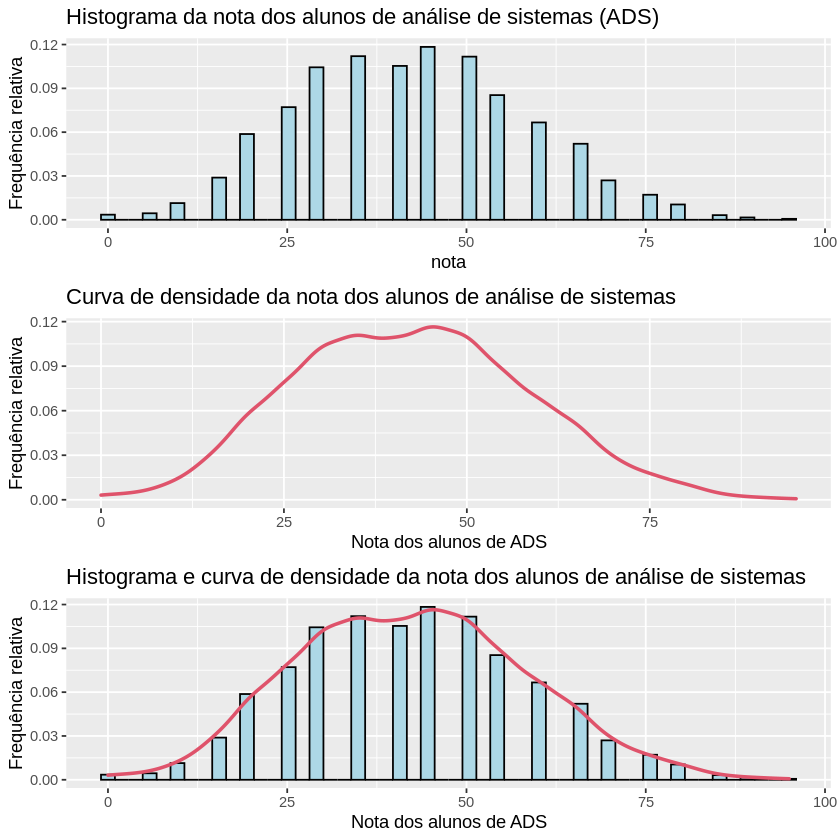

In [102]:
g_hist = ggplot(microdados_ti_sem_NA, aes(x = NT_OBJ_CE)) +
  geom_histogram(color = "black",
                 fill = "lightblue",
                 bins = 50,
                 aes(y = (..count..) / sum(..count..))) +
  ggtitle("Histograma da nota dos alunos de análise de sistemas (ADS) ") +
  xlab("nota") +
  ylab("Frequência relativa")

g_densidade = ggplot(microdados_ti_sem_NA, aes(x = NT_OBJ_CE)) +
  geom_density(col = 2, size = 1, aes(y = 27 * (..count..) / sum(..count..))) +
  ggtitle("Curva de densidade da nota dos alunos de análise de sistemas") +
  xlab("Nota dos alunos de ADS") +
  ylab("Frequência relativa")

g_hist_densidade = ggplot(microdados_ti_sem_NA, aes(x = NT_OBJ_CE)) +
  geom_histogram(color = "black",
                 fill = "lightblue",
                 bins = 50,
                 aes(y = (..count..) / sum(..count..))) +
  geom_density(col = 2, size = 1, aes(y = 27 * (..count..) / sum(..count..))) +
  ggtitle("Histograma e curva de densidade da nota dos alunos de análise de sistemas") +
  xlab("Nota dos alunos de ADS") +
  ylab("Frequência relativa")

grid.arrange(g_hist,
             g_densidade,
             g_hist_densidade,
             nrow = 3,
             ncol = 1)

### Comparando as médias por sexo e estado civil

In [108]:
microdados_ti_mod2 = microdados_ti_sem_NA %>%
  select(estado_civil, NT_GER, sexo) %>%
  group_by(sexo, estado_civil) %>%
  summarise(
            quantidade = n(),
            media = mean(NT_GER, na.rm = T),
            mediana = median(NT_GER, na.rm = T),
            cv = sd(NT_GER, na.rm = T) / media * 100,
            amplitude_interquartil = IQR(NT_GER)
  ) %>% arrange(desc(mediana))

microdados_ti_mod2

`summarise()` has grouped output by 'sexo'. You can override using the `.groups` argument.



sexo,estado_civil,quantidade,media,mediana,cv,amplitude_interquartil
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Feminino,Outro,13,46.60769,48.90,27.198620,12.800
Masculino,Outro,67,40.41642,40.90,30.252654,17.600
Feminino,Solteiro(a),391,40.38056,40.00,31.750542,17.600
Masculino,Solteiro(a),2142,40.22698,39.80,32.507521,18.800
Masculino,Casado(a),446,40.04753,39.65,33.473609,19.375
Masculino,Separado(a),41,42.03415,38.50,36.510281,19.200
Feminino,Casado(a),42,36.59286,36.10,24.486108,13.425
Feminino,Separado(a),7,41.81429,35.90,37.329645,15.850
Masculino,Viúvo(a),2,35.85000,35.85,2.169644,0.550


### Tabulação cruzada

In [112]:
table(microdados_ti_sem_NA$estado_civil,
        microdados_ti_sem_NA$sexo)

             
              Feminino Masculino
  Casado(a)         42       446
  Outro             13        67
  Separado(a)        7        41
  Solteiro(a)      391      2142
  Viúvo(a)           0         2

### Tabulação cruzada proporção

In [113]:
prop.table(table(
  microdados_ti_sem_NA$estado_civil,
  microdados_ti_sem_NA$sexo
))

             
                  Feminino    Masculino
  Casado(a)   0.0133291019 0.1415423675
  Outro       0.0041256744 0.0212630911
  Separado(a) 0.0022215170 0.0130117423
  Solteiro(a) 0.1240875912 0.6797841955
  Viúvo(a)    0.0000000000 0.0006347191

### Assimetria e curtose

In [114]:
dados_casados = microdados_ti_sem_NA %>%
  select(estado_civil, NT_GER, sexo) %>%
  group_by(estado_civil) %>%
  #filter(estado_civil=="Casado(a)") %>%
  summarise(
    quantidade = n(),
    media = mean(NT_GER),
    mediana = median(NT_GER),
    cv = sd(NT_GER) / media * 100,
    amplitude_interquartil = IQR(NT_GER),
    assimetria = skewness(NT_GER),
    curtose = kurtosis(NT_GER)
  ) %>%
  
  arrange(desc(cv))

dados_casados

estado_civil,quantidade,media,mediana,cv,amplitude_interquartil,assimetria,curtose
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Separado(a),48,42.00208,38.35,36.229033,19.775,4.459433e-01,-0.02147173
Casado(a),488,39.75020,39.35,32.984143,18.625,3.229903e-01,-0.02321985
Solteiro(a),2533,40.25069,39.80,32.385177,18.600,1.331289e-01,-0.18939157
Outro,80,41.42250,41.95,30.016268,17.925,-1.187117e-01,-0.36537545
Viúvo(a),2,35.85000,35.85,2.169644,0.550,6.871366e-15,-2.75000000


### Análises Gráficas - Comparando as médias por sexo e estado civil

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



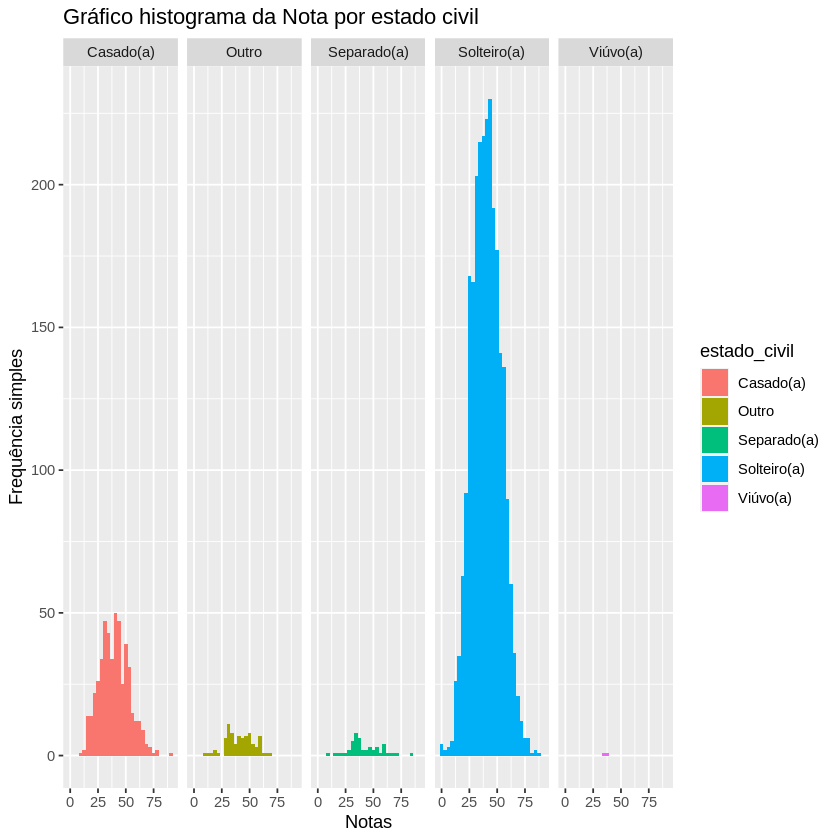

In [119]:
dados = microdados_ti_sem_NA
grafico_histograma1 = ggplot(dados, aes(x = NT_GER, fill = estado_civil)) +
    geom_histogram() +
    ggtitle("Gráfico histograma da Nota por estado civil") +
    xlab("Notas") +
    ylab("Frequência simples") +
    facet_grid( ~ estado_civil) + stat_bin(bins = 30)

grafico_histograma1

#### Gráfico de Box-plot da Nota por Estado civil e Sexo

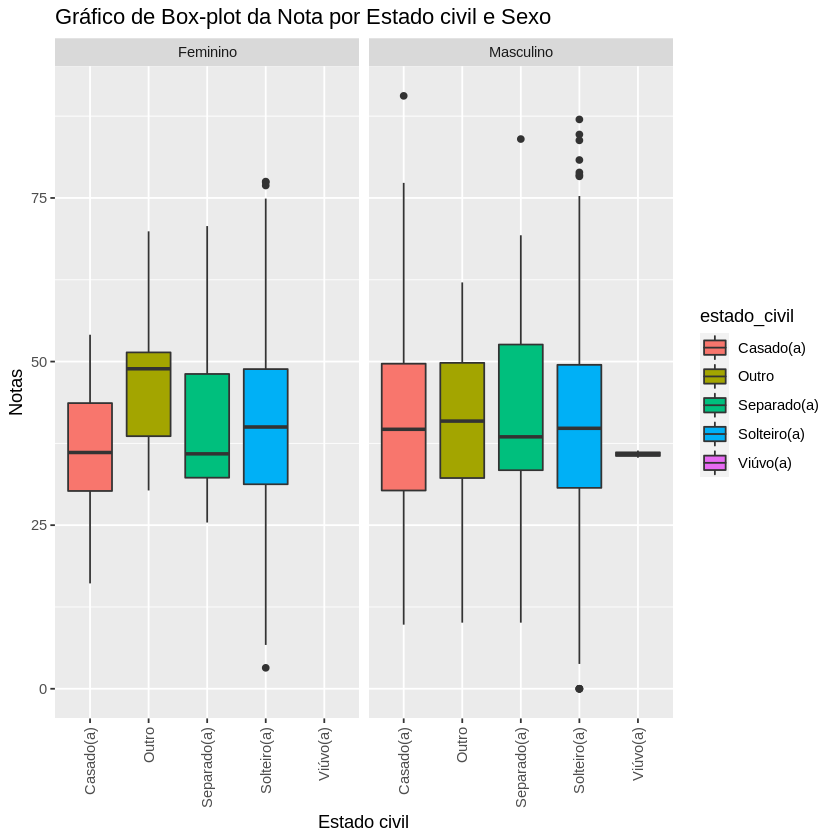

In [120]:
dados = microdados_ti_sem_NA
grafico_boxplot1 = ggplot(dados, aes(x = estado_civil, y = NT_GER, fill =
                                       estado_civil)) +
  geom_boxplot() +
  ggtitle("Gráfico de Box-plot da Nota por Estado civil e Sexo") +
  xlab("Estado civil") +
  ylab("Notas") +
  facet_grid( ~ sexo) +
  theme(axis.text.x = element_text(
    angle = 90,
    vjust = 0.5,
    hjust = 1
  ))

grafico_boxplot1

#### Comparando as médias por sexo e região

In [121]:
microdados_ti_mod3 = microdados_ti_sem_NA %>%
  select(estado_civil, NT_GER, regiao, hestudos, sexo) %>%
  group_by(sexo, regiao) %>%
  summarise(
    quantidade = n(),
    media = mean(NT_GER),
    mediana = median(NT_GER),
    cv = sd(NT_GER) / media * 100,
    amplitude_interquartil = IQR(NT_GER),
    assimetria = skewness(NT_GER),
    curtose = kurtosis(NT_GER)
  ) %>%
  arrange(desc(media))

microdados_ti_mod3

`summarise()` has grouped output by 'sexo'. You can override using the `.groups` argument.



sexo,regiao,quantidade,media,mediana,cv,amplitude_interquartil,assimetria,curtose
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Feminino,Sul,71,43.62394,43.60,27.02639,12.700,0.07247927,-0.26306828
Masculino,Norte,137,42.17007,42.50,29.99258,18.700,-0.02418353,-0.64648051
Masculino,Sul,607,42.10857,42.20,30.64224,18.400,-0.02979170,-0.21383443
Feminino,Nordeste,55,41.81455,39.70,28.46861,13.400,1.07870867,0.89619310
Masculino,Sudeste,1528,39.71230,39.30,32.30748,18.400,0.20882331,-0.07804523
Feminino,Sudeste,284,39.29648,38.95,32.60022,18.350,0.08683476,-0.24502728
Feminino,Norte,28,39.20000,37.80,32.65683,16.975,0.72998990,0.47810165
Masculino,Nordeste,329,39.10152,37.70,37.51756,21.000,0.36874927,-0.18551659
Feminino,Centro-Oeste,15,37.96000,32.30,34.04767,17.600,0.45536311,-1.18373619


In [123]:
table(microdados_ti_sem_NA$regiao, microdados_ti_sem_NA$sexo)

              
               Feminino Masculino
  Centro-Oeste       15        97
  Nordeste           55       329
  Norte              28       137
  Sudeste           284      1528
  Sul                71       607

In [124]:
prop.table(table(microdados_ti_sem_NA$regiao, microdados_ti_sem_NA$sexo))

              
                  Feminino   Masculino
  Centro-Oeste 0.004760394 0.030783878
  Nordeste     0.017454776 0.104411298
  Norte        0.008886068 0.043478261
  Sudeste      0.090130117 0.484925421
  Sul          0.022532529 0.192637258

#### Análises Gráficas - Comparando as médias por sexo e região

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



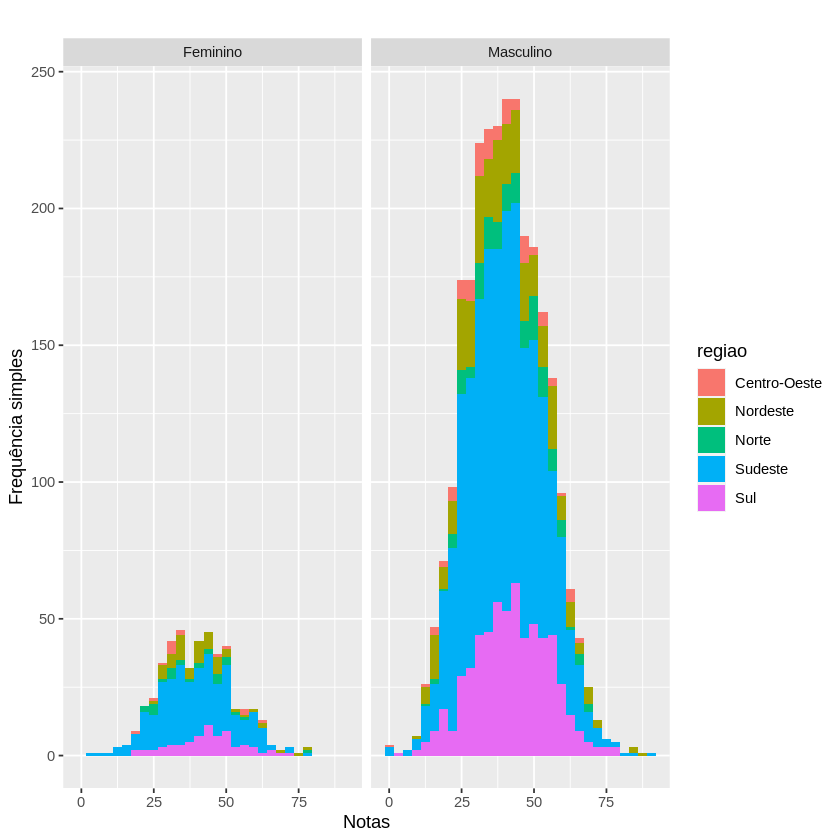

In [131]:
dados = microdados_ti_sem_NA
grafico_histograma2 = ggplot(dados, aes(x = NT_GER, fill = regiao)) +
                    geom_histogram() +
                    ggtitle("") +
                    xlab("Notas") +
                    ylab("Frequência simples") +
                    facet_grid( ~ sexo)

grafico_histograma2

#### Gráfico boxplot da Nota por região e sexo

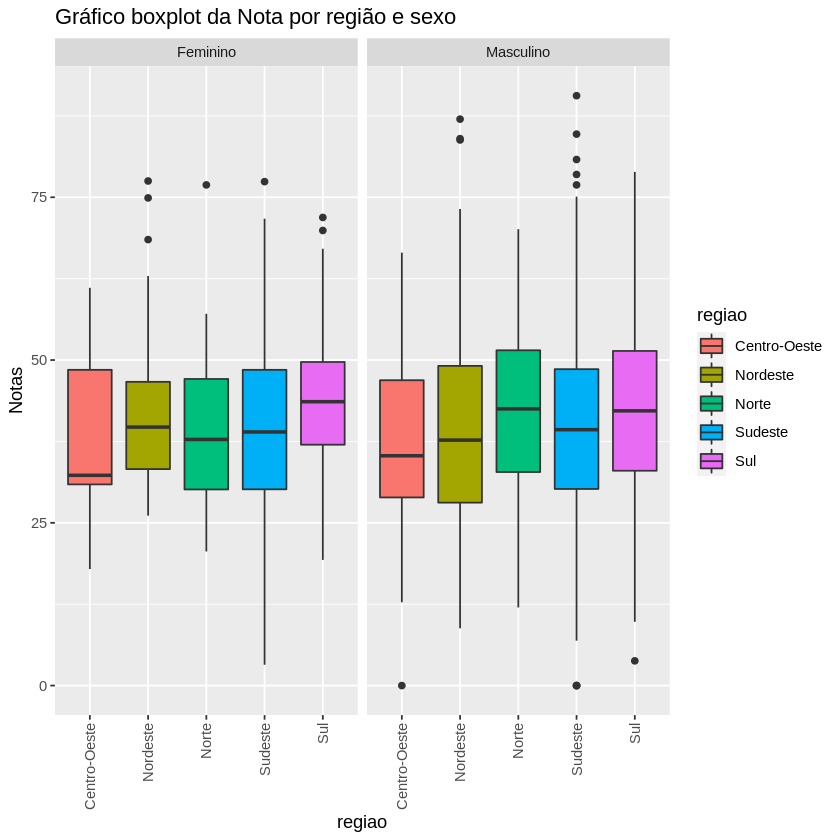

In [130]:
dados = microdados_ti_sem_NA
grafico_boxplot2 = ggplot(dados, aes(x = regiao, y = NT_GER, fill = regiao)) +
                    geom_boxplot() +
                    ggtitle("Gráfico boxplot da Nota por região e sexo") +
                    ylab("Notas") +
                    facet_grid( ~ sexo) +
                    theme(axis.text.x = element_text(
                                                    angle = 90,
                                                    vjust = 0.5,
                                                    hjust = 1
  ))
grafico_boxplot2

##### Consolidando os gráficos

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



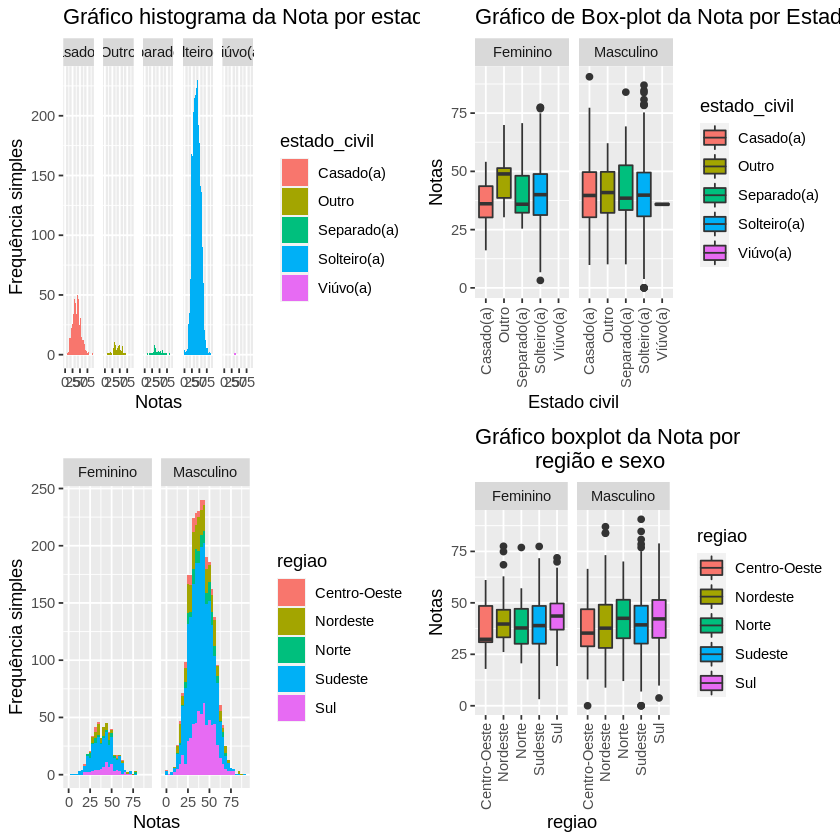

In [127]:
grid.arrange(
  grafico_histograma1,
  grafico_boxplot1,
  grafico_histograma2,
  grafico_boxplot2,
  nrow = 2,
  ncol = 2
)